# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt     # for creating plots
import pandas as pd                 # for handling and structuring data
import numpy as np                  # for generating random numbers and handling numerical operations
import requests                     # for API calls
import time                         # for adding delays to API calls - to prevent charges
from scipy.stats import linregress  # for calculating linear regression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key  # for authenticating requests to the OpenWeather API

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy           # library 

import json
from pprint import pprint           # adding because I like pretty print!

# import datetime to convert the unix timestamp from the dataset
from datetime import datetime 

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Defining the range of latitudes and longitudes
lat_range = (-90, 90)     # -90 (South Pole) to 90 (North Pole)
lng_range = (-180, 180)   # -180 (westernmost point) to 180 (easternmost point)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)   # generates 1500 random latitude values
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)   # generates 1500 random longtude values
lat_lngs = zip(lats, lngs)     # pairs each latitude with it's corresponding longitude - a tuple!

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list  -- eliminates duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# begin with looking at the weather data for a specific city to get a general understanding of the data

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with city
city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

# pick an example city
city = "Minneapolis"

# send an API request and convert it into a python dictionary (JSON format)
city_weather = requests.get(city_url).json() 

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 38.5167, 'lon': -28.7},
 'dt': 1738512754,
 'id': 3372707,
 'main': {'feels_like': 18.4,
          'grnd_level': 1021,
          'humidity': 88,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 18.22,
          'temp_max': 18.22,
          'temp_min': 17.65},
 'name': 'Ribeira Grande',
 'sys': {'country': 'PT',
         'id': 6883,
         'sunrise': 1738486759,
         'sunset': 1738523860,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 215, 'gust': 10.28, 'speed': 8.05}}


In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to track the progress
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
                     #api key               &query = the city we're looking for
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"  # put in metric so the data comes as Celsius

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trail
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | qurayyat
Processing Record 6 of Set 1 | rouissat
Processing Record 7 of Set 1 | kiffa
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | ola
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | archangelos
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | sankt peter
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | sechura
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | libreville
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | tarawa
Processing Record 23 of Set 1 | kodiak
Proces

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lon           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trail,49.0998,-117.7022,-8.51,94,100,0.51,CA,1738512756
1,invercargill,-46.4000,168.3500,7.07,89,90,2.53,NZ,1738512758
2,albany,42.6001,-73.9662,-10.76,70,93,0.89,US,1738512636
3,lihue,21.9789,-159.3672,17.77,77,100,2.57,US,1738512760
4,qurayyat,31.3318,37.3428,14.10,28,0,2.06,SA,1738512761


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,trail,49.0998,-117.7022,-8.51,94,100,0.51,CA,1738512756
1,invercargill,-46.4000,168.3500,7.07,89,90,2.53,NZ,1738512758
2,albany,42.6001,-73.9662,-10.76,70,93,0.89,US,1738512636
3,lihue,21.9789,-159.3672,17.77,77,100,2.57,US,1738512760
4,qurayyat,31.3318,37.3428,14.10,28,0,2.06,SA,1738512761


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [22]:
# Convert Unix Timestamp 
today_date = datetime.today().strftime('%Y-%m-%d')
print(today_date)


2025-02-02


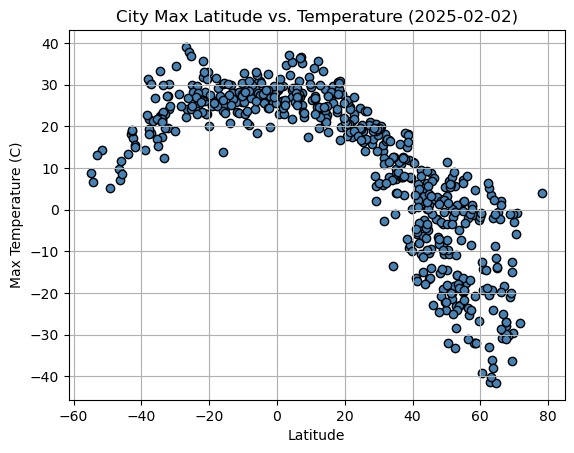

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

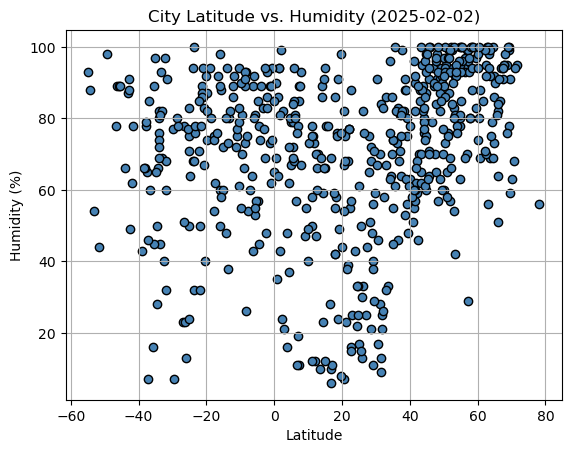

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

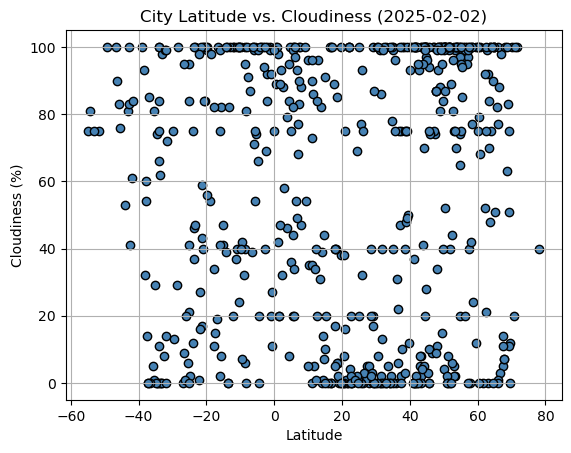

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

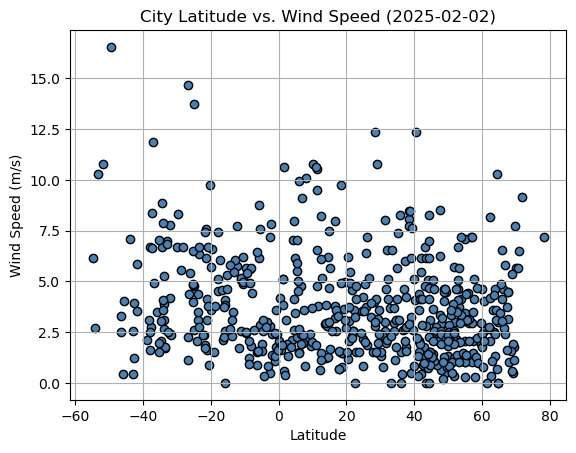

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):

    # perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # get regression values
    regression_values = slope * x_values + intercept

    # create the scatter plot
    plt.scatter(x_values, y_values, marker = "o", color = "steelblue")

    # label plot and annotate the line equation
    plt.plot(x_values, regression_values, color = "red")
  
    # print the equation in my graph (string)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    #plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

    # set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show() 

    # Return the r^2 value
    return rvalue**2 

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,trail,49.0998,-117.7022,-8.51,94,100,0.51,CA,1738512756
2,albany,42.6001,-73.9662,-10.76,70,93,0.89,US,1738512636
3,lihue,21.9789,-159.3672,17.77,77,100,2.57,US,1738512760
4,qurayyat,31.3318,37.3428,14.10,28,0,2.06,SA,1738512761
5,rouissat,31.9243,5.3502,18.10,25,13,6.56,DZ,1738512763


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,7.07,89,90,2.53,NZ,1738512758
9,waitangi,-43.9535,-176.5597,13.29,66,53,7.10,NZ,1738512767
17,sechura,-5.5569,-80.8222,27.49,53,54,2.84,PE,1738512777
18,port-aux-francais,-49.3500,70.2167,5.15,98,100,16.55,TF,1738512778
20,port mathurin,-19.6833,63.4167,27.02,87,100,6.61,MU,1738512781


###  Temperature vs. Latitude Linear Regression Plot

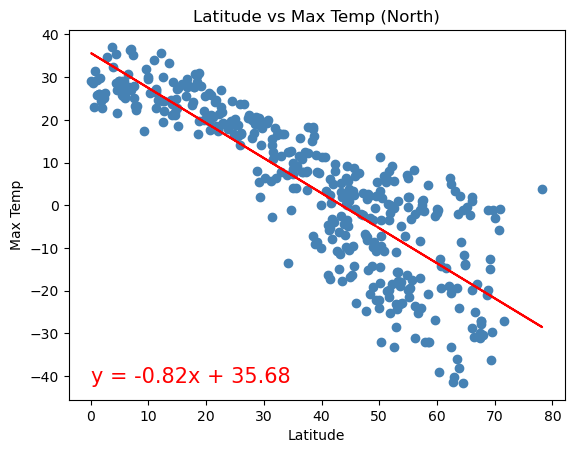

The r^2-value is: 0.7296538516128348


In [52]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")


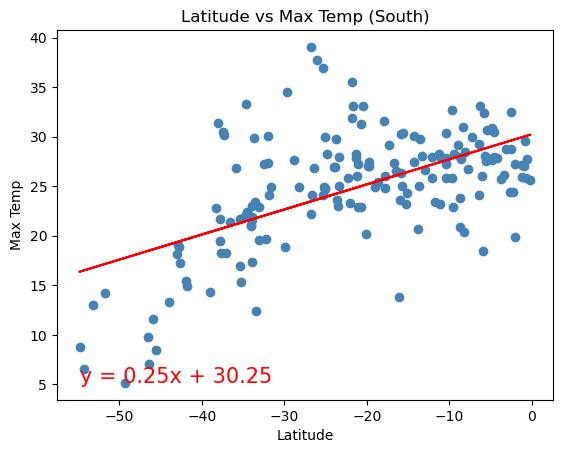

The r^2-value is: 0.3322723238002593


In [53]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")


**Discussion about the linear relationship:** 
Looking at the northern hemisphere linear regression, I observed a moderately strong negative correlation: as you move north from the equator, the temperature tends to drop. The r² value of 0.79 tells me this relationship is a good model. The y-intercept of 35.68°C suggests that the temperature at the equator would be quite hot. The line's slope of -0.82 shows a significant decrease in temperature as you move north. I saw temperatures in the 60-80° latitude range dropping as low as -40°C, with one outlier at 80° N showing a temperature near 0°C.
For the southern hemisphere, I noticed a moderately weak positive correlation: temperatures near the equator tend to be warmer, but with an r² value of only 0.33, the relationship isn’t very strong. The data points are widely clustered around temperatures of 20-30°C and latitudes from -35° to 0°, with a noticeable dip into colder temperatures around latitudes of -35° to -50°. The majority of points are in the warmer temperature range.
Interestingly, more northern cities are experiencing colder temperatures than southern cities, which makes sense because the Northern Hemisphere is in its winter months. If I wanted to explore this further, I might analyze the percentage of northern vs. southern cities experiencing temperatures below 3°C, but I’m not diving that deep just yet.
Overall, the data supports the idea that latitude has a significant impact on temperature, with the Northern Hemisphere showing colder temperatures due to its winter season.

### Humidity vs. Latitude Linear Regression Plot

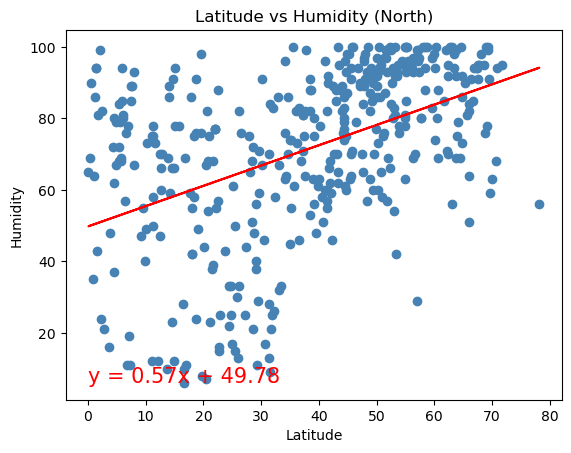

The r^2-value is: 0.2111264301039526


In [54]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"],  
    "Latitude", 
    "Humidity", 
    "Latitude vs Humidity (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")

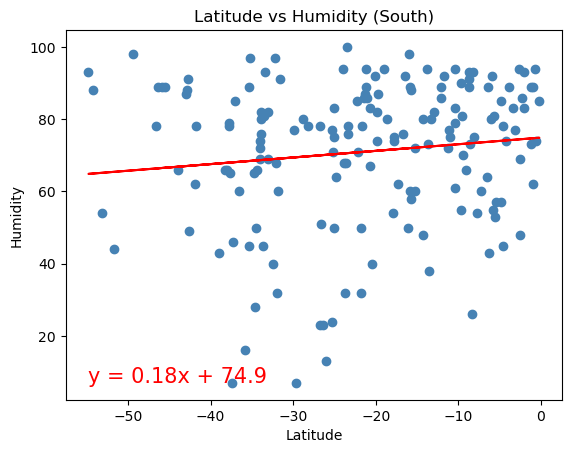

The r^2-value is: 0.015405024404652861


In [55]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"],  
    "Latitude", 
    "Humidity", 
    "Latitude vs Humidity (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


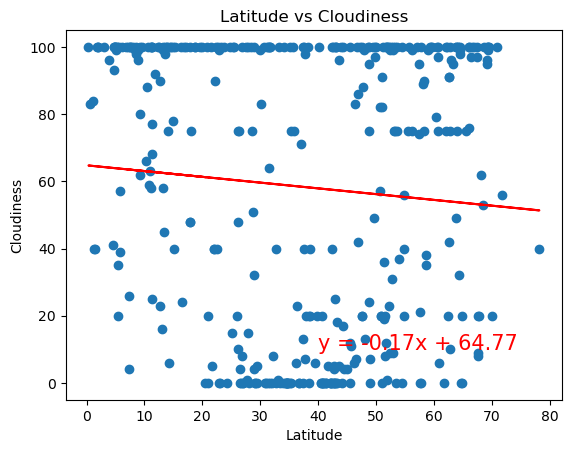

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


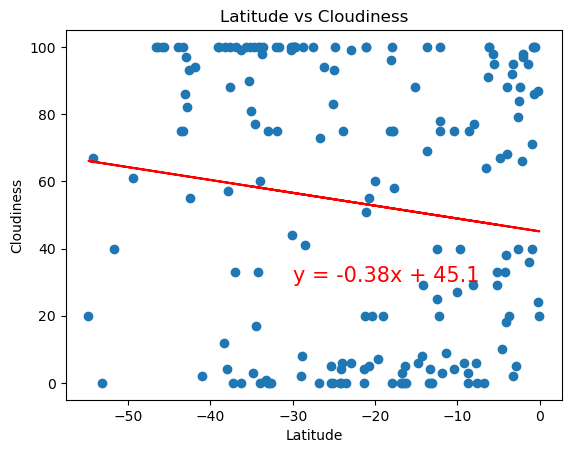

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


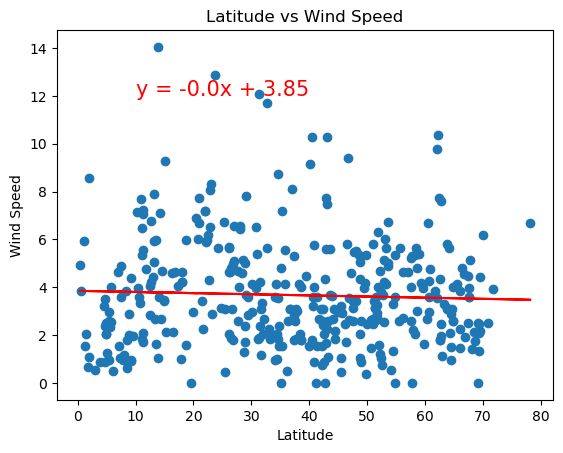

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


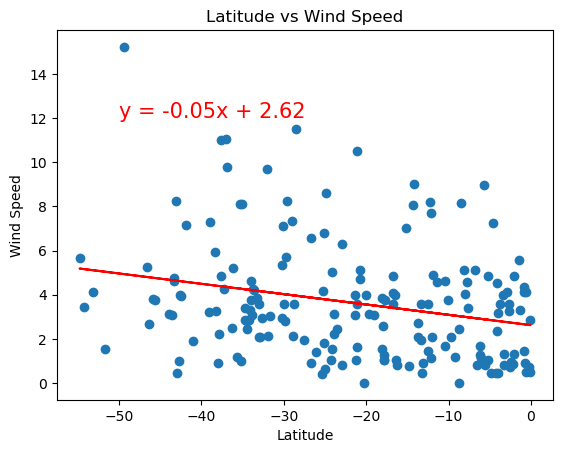

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE